In [1]:
from application.ResNet.resnet36 import model_builder
from tensorflow.keras.utils import plot_model

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import plotly.graph_objs as go

from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model, load_img, img_to_array
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

In [2]:
model = model_builder.build((224, 224, 3), 100)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 109, 109, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 109, 109, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

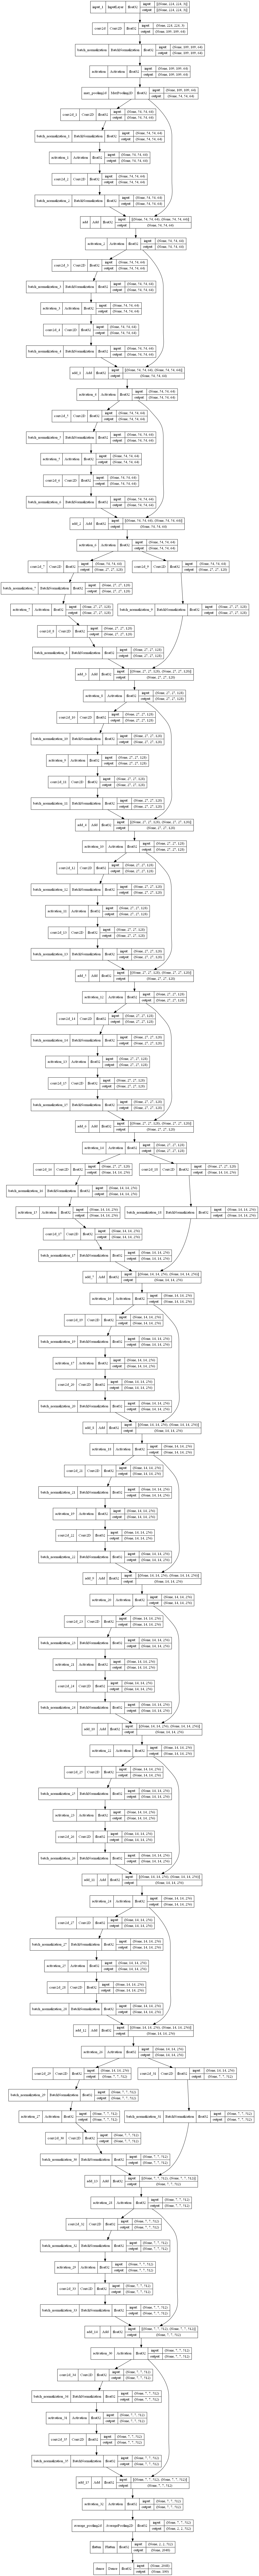

In [3]:
plot_model(model, show_dtype=True, show_shapes=True)

### load training results

In [2]:
# dataset 1
vgg_1 = pd.read_pickle('../../../images/computer vision/ResNet/vgg_data_1.pkl')
inc_1 = pd.read_pickle('../../../images/computer vision/ResNet/inc_data_1.pkl')
res_1 = pd.read_pickle('../../../images/computer vision/ResNet/res_data_1.pkl')

# dataset 2
vgg_2 = pd.read_pickle('../../../images/computer vision/ResNet/vgg_data_2.pkl')
inc_2 = pd.read_pickle('../../../images/computer vision/ResNet/inc_data_2.pkl')
res_2 = pd.read_pickle('../../../images/computer vision/ResNet/res_data_2.pkl')

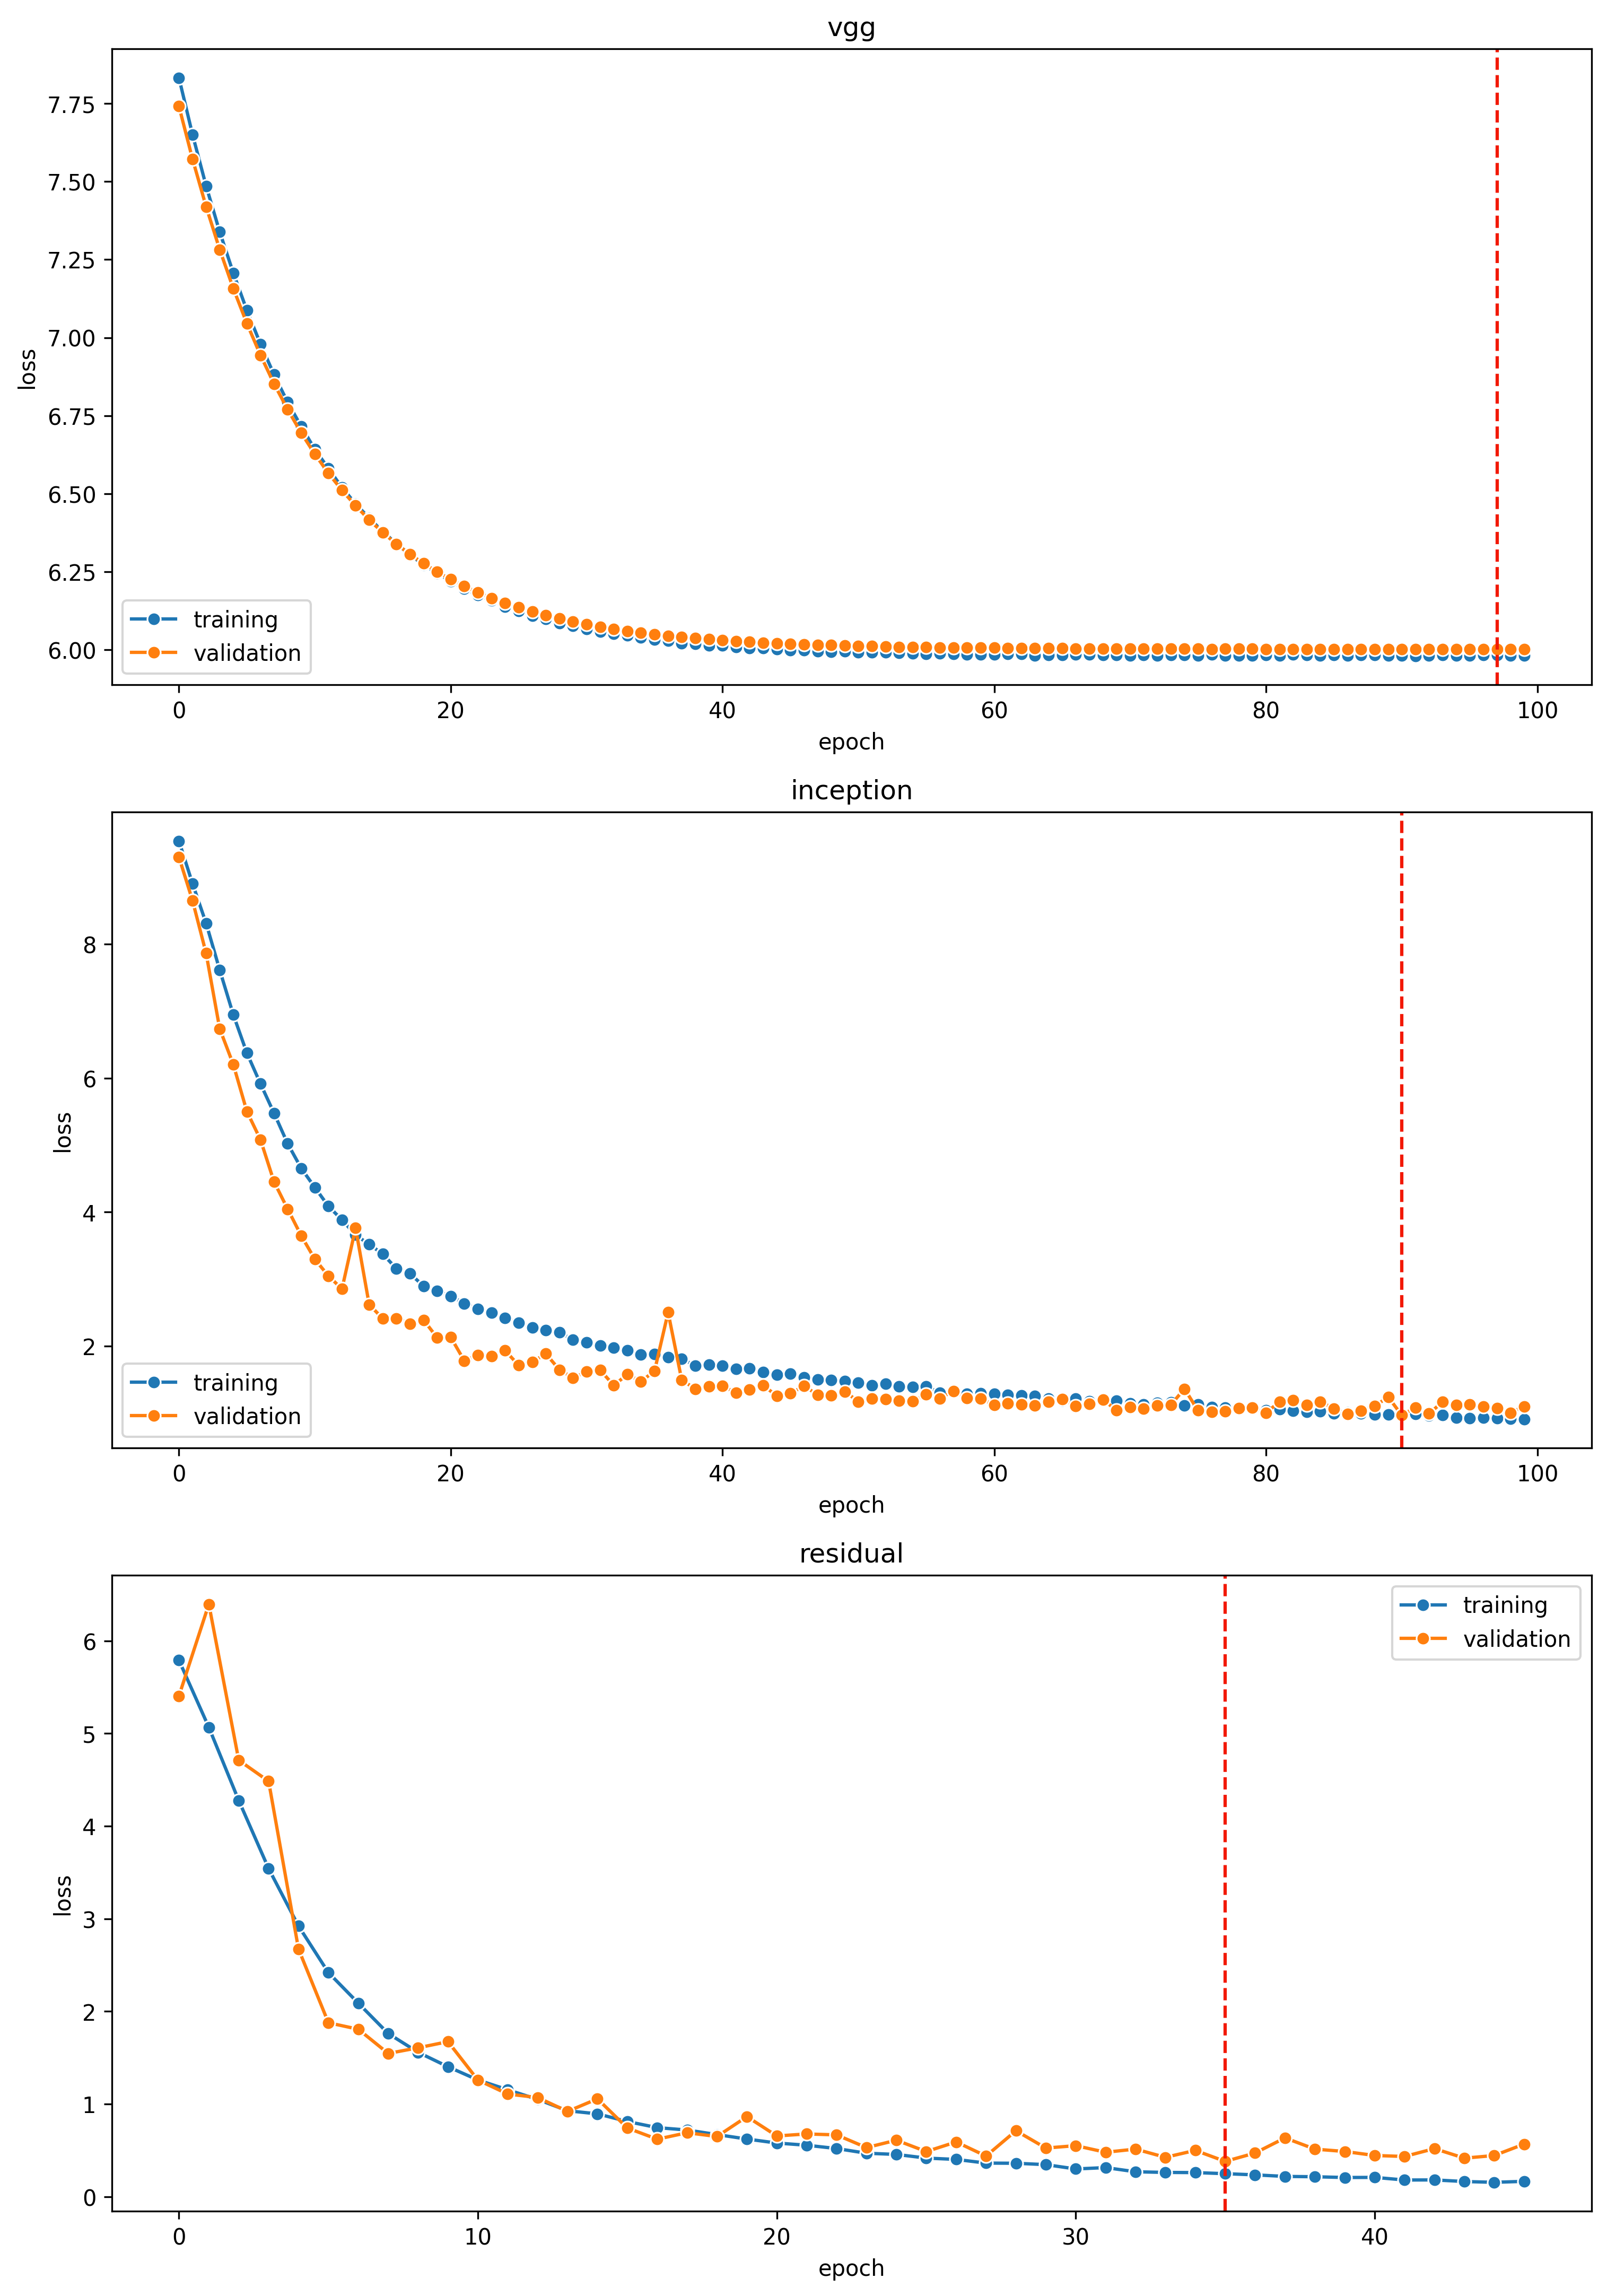

In [7]:
# dataset 1
figure, axes = plt.subplots(nrows=3, ncols=1, figsize=[12, 18], dpi=300)
axes = axes.ravel()
networks = ['vgg', 'inception', 'residual']
versions = [vgg_1, inc_1, res_1]

for i in range(3):
    epochs = len(versions[i])

    sns.lineplot(x=list(range(epochs)),
                 y=versions[i]['loss'],
                 marker='o',
                 label='training',
                 ax=axes[i])
    sns.lineplot(x=list(range(epochs)),
                 y=versions[i]['val_loss'],
                 marker='o',
                 label='validation',
                 ax=axes[i])

    axes[i].axvline(x=np.argmin(versions[i]['val_loss']), color='#F21905', linestyle='--')
    axes[i].set_title(networks[i])
    axes[i].set_xlabel('epoch')
    axes[i].set_ylabel('loss')

plt.savefig('../../../images/computer vision/ResNet/compare-version-losses.jpg')
plt.show()

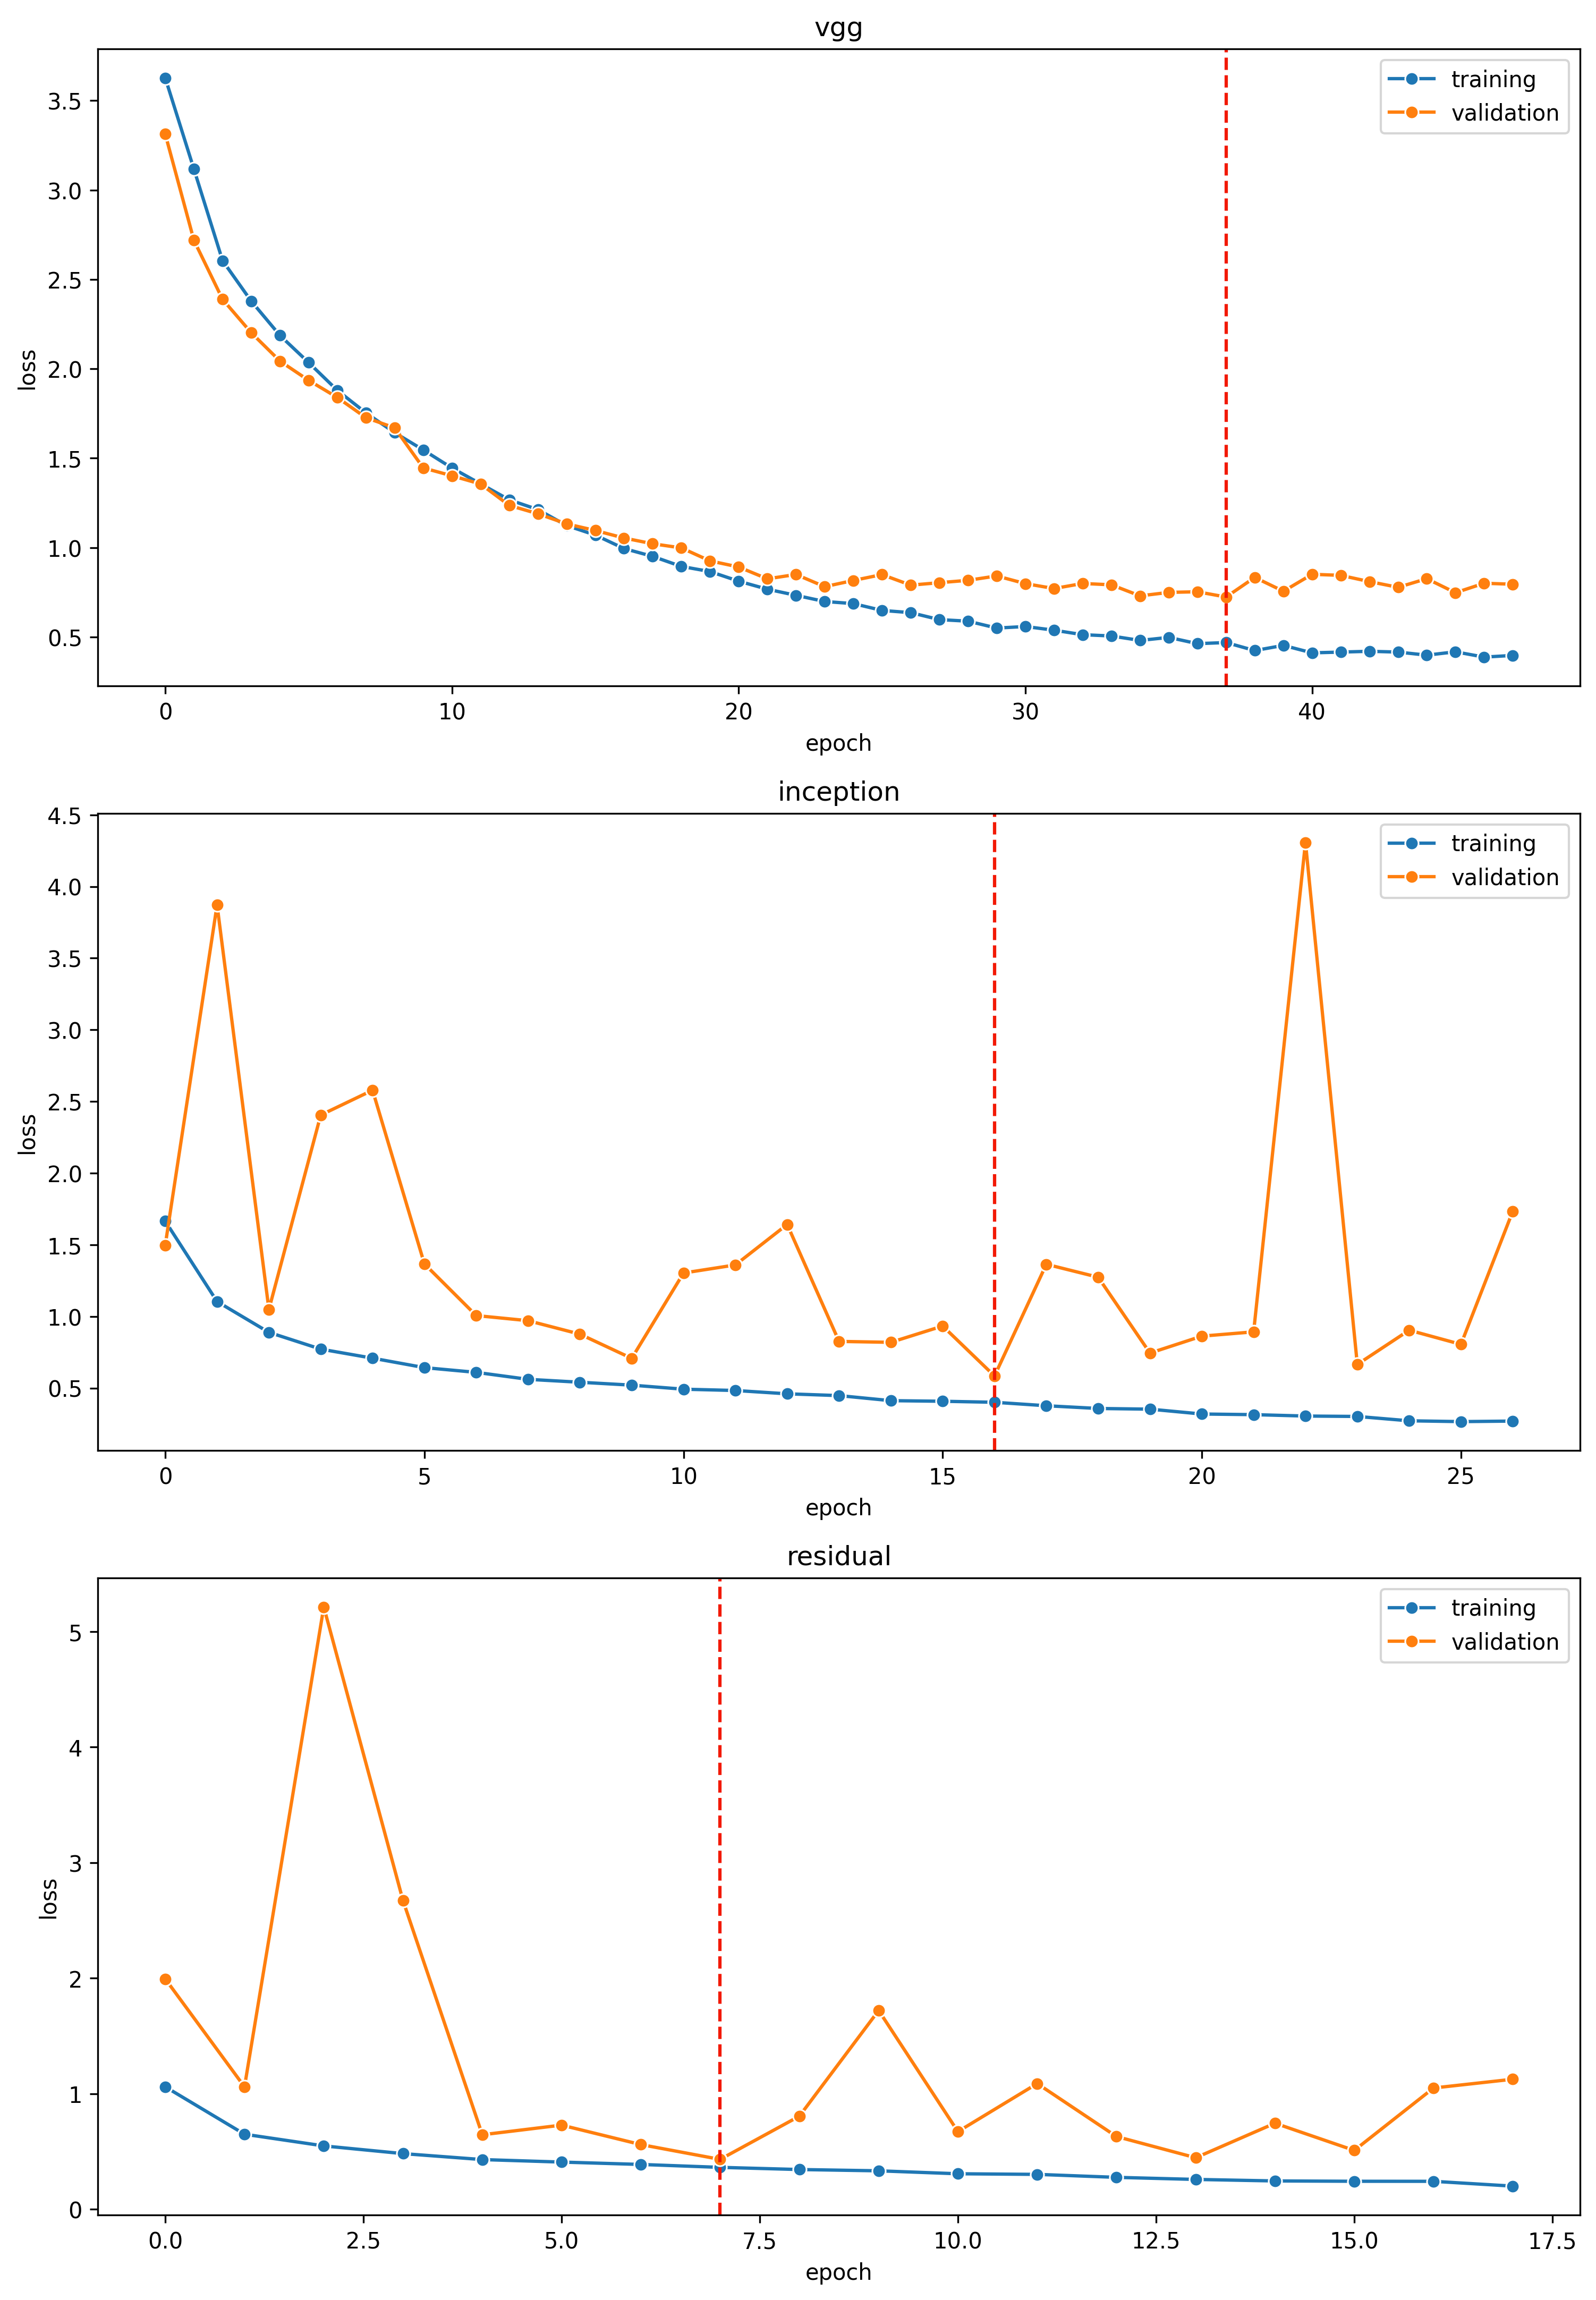

In [8]:
# dataset 2
figure, axes = plt.subplots(nrows=3, ncols=1, figsize=[12, 18], dpi=300)
axes = axes.ravel()
networks = ['vgg', 'inception', 'residual']
versions = [vgg_2, inc_2, res_2]

for i in range(3):
    epochs = len(versions[i])

    sns.lineplot(x=list(range(epochs)),
                 y=versions[i]['loss'],
                 marker='o',
                 label='training',
                 ax=axes[i])
    sns.lineplot(x=list(range(epochs)),
                 y=versions[i]['val_loss'],
                 marker='o',
                 label='validation',
                 ax=axes[i])

    axes[i].axvline(x=np.argmin(versions[i]['val_loss']), color='#F21905', linestyle='--')
    axes[i].set_title(networks[i])
    axes[i].set_xlabel('epoch')
    axes[i].set_ylabel('loss')

plt.savefig('../../../images/computer vision/ResNet/compare-version-losses-dataset-2.jpg')
plt.show()